In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
from scipy.interpolate import interp1d
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
import multiprocessing
from subprocess import Popen, PIPE, STDOUT

from multiprocessing import Process, Queue
# from joblib import Parallel, delayed
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels
sns.set(style="darkgrid")
%matplotlib inline

Automatically created module for IPython interactive environment


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# for including Sex and Age information

In [38]:
#data0=pd.read_csv("Demo_Label1_1Day.csv",header=None, index_col=None)
#data0.columns = [ "Age","Sex","Label"]
#data0=pd.read_csv("Demo_Label1_1Day_Someothervalues.csv",header=None, index_col=None)
#data0=pd.read_csv("Demo__1Day_Label1_cutoffFour_Someothervalues.csv",header=None, index_col=None)
data0=pd.read_csv("Demo__1Day_Label1_DifferentCutoffs.csv",header=None, index_col=None)
data0.columns = [ "Age","Sex","Label 0-3","Label 0-4","Label 0-5","Label 0-2"]

In [39]:
#data1=pd.read_csv("cA2__1Day_Label1.csv",header=None, index_col=None)
#data=data.transpose()
#X0=data.loc[:,0:9]
#data1=pd.read_csv("cA2__1Day_Label1_Someothervalues.csv",header=None, index_col=None)
#data1=pd.read_csv("cA2__1Day_Label1_cutoffFour_Someothervalues.csv",header=None, index_col=None)
data1=pd.read_csv("cA2__1Day_Label1_DifferentCutoffs.csv",header=None, index_col=None)
data1=data1.transpose()
#X0=data.loc[:,0:9]


In [86]:
# Selecting special cutoff labels
X0=[data0.loc[:,'Age'],data0.loc[:,'Sex'],data0.loc[:,'Label 0-3']]
#X0=[data0.loc[:,'Age'],data0.loc[:,'Sex'],data0.loc[:,'Label 0-2']]
X0=pd.concat(X0,axis=1)


In [87]:
data=[data1,X0]
data=pd.concat(data,axis=1)
data = data.rename(columns={'Label 0-3' : 'Label'})

In [88]:
data

,0,1,2,3,4,5,6,7,8,9,Age,Sex,Label
0,1.035700e+01,1.044300e+01,5.444700,6.04580,7.141800,6.841000e+00,1.018000e+01,8.543700,8.333900e+00,1.291600e+01,69,'FEMALE','Mild'
1,5.908200e+00,5.879500e+00,5.085600,2.68290,3.069500,7.974000e+00,1.161200e+01,10.752000,9.127200e+00,8.080900e+00,60,'FEMALE','Mild'
2,1.725700e+01,1.616200e+01,4.593800,5.28450,14.610000,1.549400e+01,1.446900e+01,16.087000,1.037900e+01,1.322500e+01,68,'FEMALE','Mild'
3,8.189700e+00,7.960900e+00,12.751000,14.90200,13.688000,1.242000e+01,1.094400e+01,9.977100,1.093700e+01,1.192400e+01,77,'FEMALE','Not'
4,1.186700e+01,1.183800e+01,10.140000,10.41200,11.891000,1.353600e+01,1.413300e+01,12.936000,1.788300e+01,1.272600e+01,35,'MALE',''
5,6.130200e+00,6.173600e+00,7.290200,7.56320,7.117700,8.089800e+00,6.724800e+00,7.174800,1.164400e+01,6.878300e+00,46,'FEMALE','Mild'
6,6.000000e+00,6.000000e+00,6.000000,6.00170,5.940900,6.544200e+00,7.713100e+00,6.538300,6.000000e+00,6.000000e+00,39,'MALE','Mild'
7,1.718400e+01,1.664300e+01,10.494000,10.83200,12.163000,1.377000e+01,1.267300e+01,13.696000,1.306800e+01,1.470500e+01,63,'FEMALE','Not'
8,1.361900e+01,1.371400e+01,13.648000,11.66000,13.409000,1.558100e+01,1.293000e+01,11.600000,1.269900e+01,1.160500e+01,55,'FEMALE','Not'
9,1.729200e-13,3.404400e-13,0.019051,0.55575,1.462800,2.688300e-12,5.837400e-03,-0.185890,4.998200e+00,9.640900e+00,65,'FEMALE','Mild'


In [89]:
data=data[data.Label.str.contains("''") == False]


In [90]:
data

,0,1,2,3,4,5,6,7,8,9,Age,Sex,Label
0,1.035700e+01,1.044300e+01,5.444700,6.04580,7.14180,6.841000e+00,10.180000,8.54370,8.333900e+00,1.291600e+01,69,'FEMALE','Mild'
1,5.908200e+00,5.879500e+00,5.085600,2.68290,3.06950,7.974000e+00,11.612000,10.75200,9.127200e+00,8.080900e+00,60,'FEMALE','Mild'
2,1.725700e+01,1.616200e+01,4.593800,5.28450,14.61000,1.549400e+01,14.469000,16.08700,1.037900e+01,1.322500e+01,68,'FEMALE','Mild'
3,8.189700e+00,7.960900e+00,12.751000,14.90200,13.68800,1.242000e+01,10.944000,9.97710,1.093700e+01,1.192400e+01,77,'FEMALE','Not'
5,6.130200e+00,6.173600e+00,7.290200,7.56320,7.11770,8.089800e+00,6.724800,7.17480,1.164400e+01,6.878300e+00,46,'FEMALE','Mild'
6,6.000000e+00,6.000000e+00,6.000000,6.00170,5.94090,6.544200e+00,7.713100,6.53830,6.000000e+00,6.000000e+00,39,'MALE','Mild'
7,1.718400e+01,1.664300e+01,10.494000,10.83200,12.16300,1.377000e+01,12.673000,13.69600,1.306800e+01,1.470500e+01,63,'FEMALE','Not'
8,1.361900e+01,1.371400e+01,13.648000,11.66000,13.40900,1.558100e+01,12.930000,11.60000,1.269900e+01,1.160500e+01,55,'FEMALE','Not'
9,1.729200e-13,3.404400e-13,0.019051,0.55575,1.46280,2.688300e-12,0.005837,-0.18589,4.998200e+00,9.640900e+00,65,'FEMALE','Mild'
10,6.111700e-13,-2.860900e-01,1.714000,0.68792,-0.14647,9.601500e-01,5.039200,6.91310,1.415800e+01,1.220700e+01,65,'MALE','Mild'


In [91]:
data.keys()

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, u'Age', u'Sex', u'Label'], dtype='object')

In [92]:
class_le = LabelEncoder()
data['Sex'] = class_le.fit_transform(data['Sex'].values)
data['Label'] = class_le.fit_transform(data['Label'].values)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
data

,0,1,2,3,4,5,6,7,8,9,Age,Sex,Label
0,1.035700e+01,1.044300e+01,5.444700,6.04580,7.14180,6.841000e+00,10.180000,8.54370,8.333900e+00,1.291600e+01,69,0,0
1,5.908200e+00,5.879500e+00,5.085600,2.68290,3.06950,7.974000e+00,11.612000,10.75200,9.127200e+00,8.080900e+00,60,0,0
2,1.725700e+01,1.616200e+01,4.593800,5.28450,14.61000,1.549400e+01,14.469000,16.08700,1.037900e+01,1.322500e+01,68,0,0
3,8.189700e+00,7.960900e+00,12.751000,14.90200,13.68800,1.242000e+01,10.944000,9.97710,1.093700e+01,1.192400e+01,77,0,1
5,6.130200e+00,6.173600e+00,7.290200,7.56320,7.11770,8.089800e+00,6.724800,7.17480,1.164400e+01,6.878300e+00,46,0,0
6,6.000000e+00,6.000000e+00,6.000000,6.00170,5.94090,6.544200e+00,7.713100,6.53830,6.000000e+00,6.000000e+00,39,1,0
7,1.718400e+01,1.664300e+01,10.494000,10.83200,12.16300,1.377000e+01,12.673000,13.69600,1.306800e+01,1.470500e+01,63,0,1
8,1.361900e+01,1.371400e+01,13.648000,11.66000,13.40900,1.558100e+01,12.930000,11.60000,1.269900e+01,1.160500e+01,55,0,1
9,1.729200e-13,3.404400e-13,0.019051,0.55575,1.46280,2.688300e-12,0.005837,-0.18589,4.998200e+00,9.640900e+00,65,0,0
10,6.111700e-13,-2.860900e-01,1.714000,0.68792,-0.14647,9.601500e-01,5.039200,6.91310,1.415800e+01,1.220700e+01,65,1,0


In [226]:
X=[data.loc[:,0],data.loc[:,1],data.loc[:,2],data.loc[:,3],data.loc[:,4],data.loc[:,5],data.loc[:,6],data.loc[:,7],data.loc[:,8],data.loc[:,9],data.loc[:,'Age'],data.loc[:,'Sex']]
X=pd.concat(X,axis=1)
y=data.loc[:,'Label']


In [227]:
y.sum() # This is for cutoff 0-3

36

In [54]:
y.sum()

28L

In [67]:
y.sum()

14L

In [80]:
y.sum()

50L

# Split data into train and test

In [228]:
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.25, random_state=0)
print('Train set size %s' % (X_train.shape,))
print('Test set size %s' % (X_test.shape,))

Train set size (72, 12)
Test set size (25, 12)


Automatically created module for IPython interactive environment

learning on dataset PostOperativePain
training: constant learning-rate


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.847222
Training set loss: 0.367722
training: constant with momentum
Training set score: 0.652778
Training set loss: 0.669566
training: constant with Nesterov's momentum
Training set score: 0.972222
Training set loss: 0.161330
training: adam
Training set score: 1.000000
Training set loss: 0.013618

learning on dataset PostOperativePain
training: constant learning-rate
Training set score: 0.847222
Training set loss: 0.367722
training: constant with momentum
Training set score: 0.652778
Training set loss: 0.669566
training: constant with Nesterov's momentum
Training set score: 0.972222
Training set loss: 0.161330
training: adam
Training set score: 1.000000
Training set loss: 0.013618


C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\legend.py:1357: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


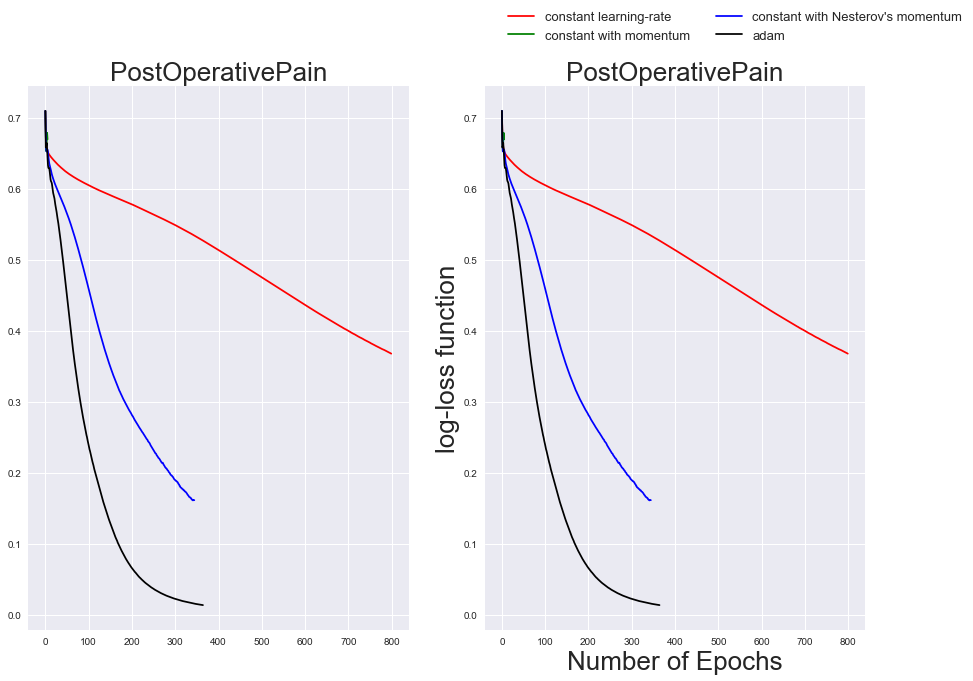

In [15]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

# different learning rate schedules and momentum parameters
#params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0, 
 #          'learning_rate_init': 0.15},
#         {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
#            'nesterovs_momentum': False, 'learning_rate_init': 0.2},
#           {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
 #           'nesterovs_momentum': True, 'learning_rate_init': 0.1},
#           {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
#            'learning_rate_init': 0.01},
#           {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
#            'nesterovs_momentum': True, 'learning_rate_init': 0.2},
#           {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
#            'nesterovs_momentum': False, 'learning_rate_init': 0.2},
 #          {'solver': 'adam', 'learning_rate_init': 0.01}]

params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0, 
           'learning_rate_init': 0.15},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.1},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

# labels = ["constant learning-rate", "constant with momentum",
#           "constant with Nesterov's momentum",
#           "inv-scaling learning-rate", "inv-scaling with momentum",
#           "inv-scaling with Nesterov's momentum", "adam"]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum","adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'black', 'linestyle': '-'}]

#  plot_args = [{'c': 'red', 'linestyle': '-'},
#               {'c': 'green', 'linestyle': '-'},
#               {'c': 'blue', 'linestyle': '-'},
#               {'c': 'red', 'linestyle': '--'},
#               {'c': 'green', 'linestyle': '--'},
#               {'c': 'blue', 'linestyle': '--'},
#               {'c': 'black', 'linestyle': '-'}]

def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name,fontsize=26)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 800

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
            ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(1,2,figsize=(15, 10))
plt.plot(linewidth=4.0)
# load / generate some toy datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
data_sets = [(X_train, y_train),(X_train, y_train)] # I am just using the training set for this part.
plt.xlabel('Number of Epochs',fontsize=26)
plt.ylabel('log-loss function',fontsize=26)
for ax, data, name in zip(axes.ravel(), data_sets, ['PostOperativePain','PostOperativePain']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels=labels, ncol=2, loc="upper right",prop={'size':13})
plt.show()

Automatically created module for IPython interactive environment

learning on dataset Post Operative Pain
training: hidden_layer_sizes=2
Training set score: 0.638889
Training set loss: 0.708355
training: hidden_layer_sizes=4


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.861111
Training set loss: 0.294502
training: hidden_layer_sizes=6
Training set score: 0.888889
Training set loss: 0.282253
training: hidden_layer_sizes=8
Training set score: 0.944444
Training set loss: 0.179641
training: hidden_layer_sizes=10
Training set score: 0.652778
Training set loss: 0.672081
training: hidden_layer_sizes=12
Training set score: 0.652778
Training set loss: 0.647198
training: hidden_layer_sizes=24
Training set score: 0.722222
Training set loss: 0.654573
training: hidden_layer_sizes=32
Training set score: 1.000000
Training set loss: 0.046794

learning on dataset Post Operative Pain
training: hidden_layer_sizes=2
Training set score: 0.638889
Training set loss: 0.708355
training: hidden_layer_sizes=4
Training set score: 0.861111
Training set loss: 0.294502
training: hidden_layer_sizes=6
Training set score: 0.888889
Training set loss: 0.282253
training: hidden_layer_sizes=8
Training set score: 0.944444
Training set loss: 0.179641
training: hidden_l

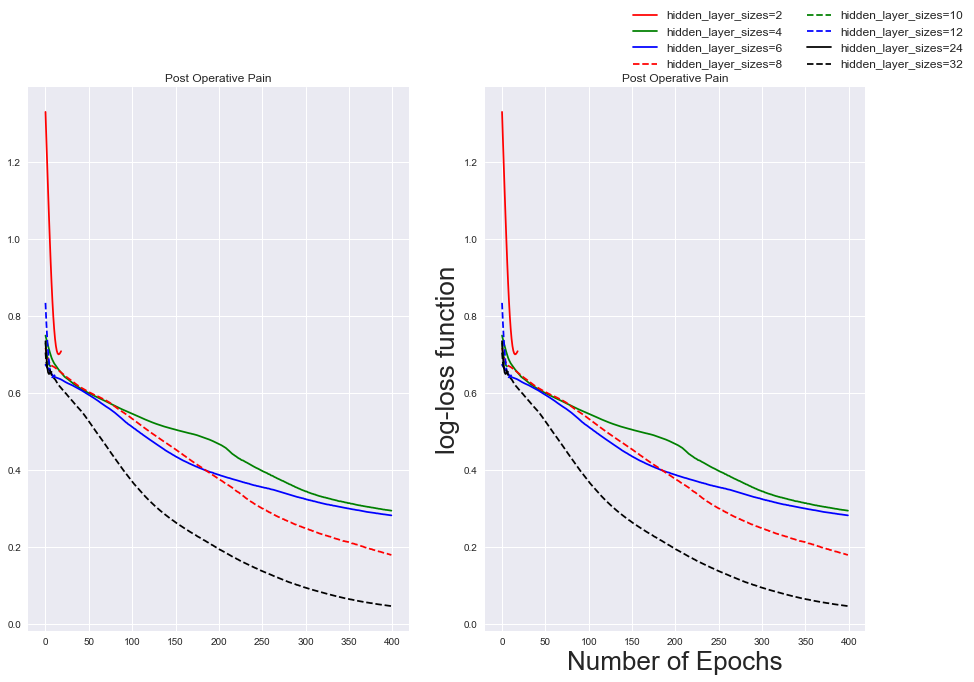

In [16]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

# different learning rate schedules and momentum parameters
params = [{'solver': 'adam','hidden_layer_sizes':(2, ), 'learning_rate_init': 0.01},
          {'solver': 'adam','hidden_layer_sizes':(4, ),'learning_rate_init': 0.01},
          {'solver': 'adam','hidden_layer_sizes':(6, ),'learning_rate_init': 0.01},
          {'solver': 'adam', 'hidden_layer_sizes':(8, ),'learning_rate_init': 0.01},
          {'solver': 'adam','hidden_layer_sizes':(10, ), 'learning_rate_init': 0.01},
          {'solver': 'adam','hidden_layer_sizes':(12, ), 'learning_rate_init': 0.01},
          {'solver': 'adam','hidden_layer_sizes':(24, ),'learning_rate_init': 0.01},
         {'solver': 'adam','hidden_layer_sizes':(32, ),'learning_rate_init': 0.01}]

labels = ["hidden_layer_sizes=2", "hidden_layer_sizes=4",
          "hidden_layer_sizes=6",
          "hidden_layer_sizes=8", "hidden_layer_sizes=10",
          "hidden_layer_sizes=12", "hidden_layer_sizes=24","hidden_layer_sizes=32"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'},
            {'c': 'black', 'linestyle': '--'}]


def plot_on_dataset(X, y, ax, name):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    ax.set_title(name)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "digits":
        # digits is larger but converges fairly quickly
        max_iter = 15
    else:
        max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
            ax.plot(mlp.loss_curve_, label=label, **args)


fig, axes = plt.subplots(1,2,figsize=(15, 10))
# load / generate some toy datasets

data_sets = [(X_train, y_train),(X_train, y_train)] # I am just using the Training set
plt.xlabel('Number of Epochs',fontsize=26)
plt.ylabel('log-loss function',fontsize=26)

for ax, data, name in zip(axes.ravel(), data_sets, ['Post Operative Pain','Post Operative Pain']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels=labels, ncol=2, loc="upper right",prop={'size':12})
plt.show()

# Linear Classifier

In [24]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

# Create linear regression object
regr =linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train, y_train, sample_weight=None)


# Make predictions using the testing set
expected = y_test
predicted = regr.predict(X_test)
 
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy_score(expected, predicted)
# The coefficients
# print('Coefficients: \n', regr.coef_)
# The mean squared error
# print("Mean squared error: %.2f"
 #     % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
#plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
#plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

Automatically created module for IPython interactive environment
             precision    recall  f1-score   support

          0       0.63      0.86      0.73        14
          1       0.67      0.36      0.47        11

avg / total       0.65      0.64      0.61        25

[[12  2]
 [ 7  4]]


0.64000000000000001

# MLP Classifier

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(32, ),verbose=0, random_state=0,max_iter=800,learning_rate_init=0.001)
mlp.fit(X_train, y_train)
#mlp.append(mlp)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Training set loss: %f" % mlp.loss_)

Training set score: 0.597222
Training set loss: 1.173459


# This is the accuracy for cutoff 3 in labels

In [21]:
# This is the accuracy for cutoff 3 in labels
from sklearn.metrics import accuracy_score
expected = y_test
predicted =mlp.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy_score(expected, predicted)

             precision    recall  f1-score   support

          0       0.91      0.71      0.80        14
          1       0.71      0.91      0.80        11

avg / total       0.82      0.80      0.80        25

[[10  4]
 [ 1 10]]


0.8

# This is the accuracy for cutoff 4 in labels

In [58]:
# This is the accuracy for cutoff 4 in labels
from sklearn.metrics import accuracy_score
expected = y_test
predicted =mlp.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy_score(expected, predicted)

             precision    recall  f1-score   support

          0       0.92      0.61      0.73        18
          1       0.46      0.86      0.60         7

avg / total       0.79      0.68      0.70        25

[[11  7]
 [ 1  6]]


0.68000000000000005

# This is the accuracy for cutoff 5 in labels

In [71]:
# This is the accuracy for cutoff 5 in labels
from sklearn.metrics import accuracy_score
expected = y_test
predicted =mlp.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy_score(expected, predicted)

             precision    recall  f1-score   support

          0       0.93      0.64      0.76        22
          1       0.20      0.67      0.31         3

avg / total       0.85      0.64      0.70        25

[[14  8]
 [ 1  2]]


0.64000000000000001

# This is the accuracy for cutoff 2 in labels

In [84]:
# This is the accuracy for cutoff 2 in labels
from sklearn.metrics import accuracy_score
expected = y_test
predicted =mlp.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy_score(expected, predicted)

             precision    recall  f1-score   support

          0       0.38      0.45      0.42        11
          1       0.50      0.43      0.46        14

avg / total       0.45      0.44      0.44        25

[[5 6]
 [8 6]]


0.44

# RBF Networks

In [23]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

Automatically created module for IPython interactive environment


In [41]:
X=X_train
y=y_train
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

#C_2d_range = [1e-2, 1, 1e2]
#gamma_2d_range = [1e-1, 1, 1e1]
C_2d_range = [1e5, 1e6, 1e3,1e4]
gamma_2d_range = [1e-4,1e-5,1e-6]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers.append((C, gamma, clf))

The best parameters are {'C': 10000.0, 'gamma': 1e-06} with a score of 0.69


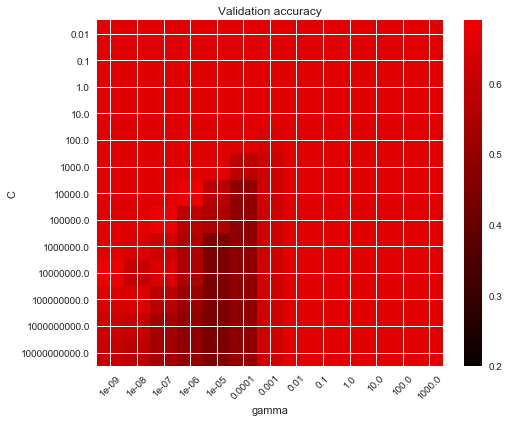

In [42]:
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [49]:
estimator = SVC(gamma=1e-5,C=100000000)
from sklearn.metrics import accuracy_score
estimator.fit(X_train, y_train)
expected = y_test
predicted =estimator.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy_score(expected, predicted)

             precision    recall  f1-score   support

          0       0.64      0.64      0.64        14
          1       0.55      0.55      0.55        11

avg / total       0.60      0.60      0.60        25

[[9 5]
 [5 6]]


0.6

# Gradient boosting Classifier

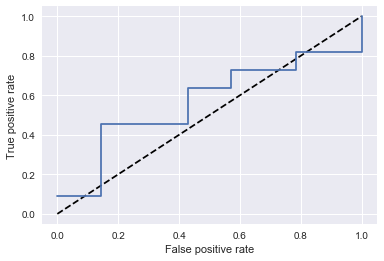

             precision    recall  f1-score   support

          0       0.65      0.79      0.71        14
          1       0.62      0.45      0.53        11

avg / total       0.64      0.64      0.63        25

[[11  3]
 [ 6  5]]


0.64

In [208]:
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
n_estimators=100
grd = GradientBoostingClassifier(n_estimators=n_estimator,loss='exponential')

grd.fit(X_train, y_train)

y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
#y_pred_grd = grd.predict_proba(X_test)[:, 1]
#fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)
expected = y_test
predicted =grd.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy_score(expected, predicted)

# Gradient boost with Linear Regrression

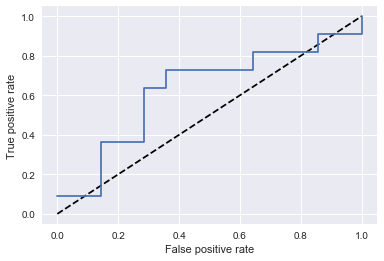

             precision    recall  f1-score   support

          0       0.65      0.79      0.71        14
          1       0.62      0.45      0.53        11

avg / total       0.64      0.64      0.63        25

[[11  3]
 [ 6  5]]


0.64

In [211]:
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
n_estimators=100
grd = GradientBoostingClassifier(n_estimators=n_estimator,loss='exponential')
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT_LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
#y_pred_grd = grd.predict_proba(X_test)[:, 1]
#fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)
expected = y_test
predicted =grd.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy_score(expected, predicted)

# Random Forest With Linear Regression

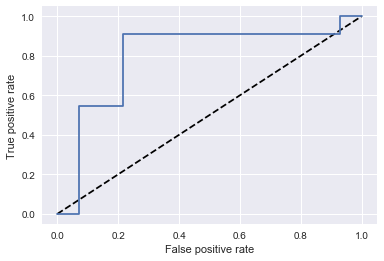

             precision    recall  f1-score   support

          0       0.91      0.71      0.80        14
          1       0.71      0.91      0.80        11

avg / total       0.82      0.80      0.80        25

[[10  4]
 [ 1 10]]


0.8

In [198]:
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)
n_estimators=50
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)
y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

predicted = rf_lm.predict(rf_enc.transform(rf.apply(X_test)))
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
accuracy_score(expected, predicted)